4

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.mediation import Mediation
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\20111\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
data = pd.read_csv('mediation_analysis.csv')
data.head()

,Caseor_Control,Differnece_RMSSD,Difference_SDNN,Difference_PNN50,Differncein_LDL,Differencein_cholesterol,Differencein_TG,Differenceof_HDL
0,3,-118,-62,-2.8,-60.0,-16,-12.0,4
1,3,9,13,1.9,-0.3,-1,-1.9,0
2,4,7,9,4.0,-4.1,-22,-16.2,5
3,3,21,13,3.2,-73.0,-29,-26.0,4
4,4,15,15,5.5,-59.9,-33,-42.0,5


In [3]:
# Step 1: Descriptive Analysis 
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Caseor_Control,60.0,3.500000,0.504219,3.0,3.000,3.50,4.000,4.0
Differnece_RMSSD,60.0,5.183333,21.753232,-118.0,-2.000,5.00,16.250,44.0
Difference_SDNN,60.0,7.050000,18.170030,-62.0,-2.500,8.50,17.500,52.0
Difference_PNN50,60.0,3.138333,6.715908,-9.6,-1.425,0.95,7.575,19.2
Differncein_LDL,60.0,-19.286667,18.057530,-73.0,-22.075,-13.00,-9.000,1.7
Differencein_cholesterol,60.0,-15.666667,11.686102,-44.0,-22.000,-15.00,-11.000,44.0
Differencein_TG,60.0,-19.318333,15.042972,-51.0,-30.000,-22.00,-7.000,10.0
Differenceof_HDL,60.0,2.983333,2.931371,-3.0,1.000,2.00,5.000,12.0


In [4]:
# Inspect the column names of the dataset
data.columns.tolist()


['Caseor_Control',
 'Differnece_RMSSD',
 'Difference_SDNN',
 'Difference_PNN50',
 'Differncein_LDL',
 'Differencein_cholesterol',
 'Differencein_TG',
 'Differenceof_HDL']

# Explanation of Distributions

## Dependent Variables
1. **DifferneceRMSSD**:
   - Represents differences in RMSSD (a metric for heart rate variability).
   - Distribution appears to be slightly skewed, with more data concentrated around a central peak and some outliers in lower values.
   - The majority of values seem to be clustered near zero or slightly positive.

2. **DifferenceSDNN**:
   - Reflects differences in SDNN (another metric for heart rate variability).
   - The distribution is relatively normal but slightly right-skewed, indicating more positive changes than negative.

3. **DifferencePNN50**:
   - Tracks differences in PNN50 (a measure of heartbeat intervals).
   - This distribution appears closer to normal with no significant skewness.
   - Values seem to cluster near the mean, with minimal extreme deviations.

## Mediators
1. **DiffernceinLDL**:
   - Represents changes in LDL (low-density lipoprotein, or "bad cholesterol").
   - The distribution is bimodal, with peaks around significant negative values (reductions in LDL) and closer to zero.

2. **Differenceincholesterol**:
   - Tracks changes in total cholesterol.
   - Distribution is unimodal, slightly skewed to the left, indicating more instances of cholesterol reduction than increase.

3. **DifferenceinTG**:
   - Reflects changes in triglycerides (a type of fat found in blood).
   - Distribution is unimodal and slightly right-skewed, indicating more increases than decreases.

4. **DifferenceofHDL**:
   - Represents changes in HDL (high-density lipoprotein, or "good cholesterol").
   - The distribution is narrow and symmetric, with most values clustered around a small range.

## Overall Observations
- The distributions indicate varied effects across different metrics.
- Some variables (e.g., `DifferenceofHDL`, `DifferencePNN50`) are more symmetrically distributed, while others (e.g., `DiffernceinLDL`, `DifferenceSDNN`) exhibit skewness or multiple peaks.
- The shapes of these distributions will influence how they respond to statistical modeling (e.g., normality assumptions for regression or SEM).


## 2- Measure the Effect of X on the three dependent variables & the Effect of X and mediators on the three dependent variables

In [5]:
#names of variable
mediators = ['Differncein_LDL', 'Differencein_cholesterol', 'Differencein_TG', 'Differenceof_HDL']
dependent_vars = ['Differnece_RMSSD', 'Difference_SDNN', 'Difference_PNN50']

# Step 1: Effect of X on the three dependent variables
effect_x_on_y = []

for dependent_var in dependent_vars:
    model = smf.ols(f"{dependent_var} ~ Caseor_Control", data=data).fit()
    coef = model.params['Caseor_Control']
    p_value = model.pvalues['Caseor_Control']
    r_squared = model.rsquared
    effect_x_on_y.append({
        "Dependent Variable": dependent_var,
        "Effect of X (Coefficient)": coef,
        "p-value": p_value,
        "R-squared": r_squared
    })

effect_x_on_y_df = pd.DataFrame(effect_x_on_y)

# Step 2: Effect of X and mediators on the three dependent variables
effect_x_m_on_y = []

for dependent_var in dependent_vars:
    formula = f"{dependent_var} ~ Caseor_Control + {' + '.join(mediators)}"
    model = smf.ols(formula, data=data).fit()
    coef = model.params['Caseor_Control']
    p_value = model.pvalues['Caseor_Control']
    r_squared = model.rsquared
    effect_x_m_on_y.append({
        "Dependent Variable": dependent_var,
        "Effect of X (Coefficient)": coef,
        "p-value": p_value,
        "R-squared": r_squared
    })

effect_x_m_on_y_df = pd.DataFrame(effect_x_m_on_y)

# Display both results to the user


print("\nMediation Analysis: Mediation Analysis: Effect of X on Dependent Variables")
effect_x_on_y_df





Mediation Analysis: Mediation Analysis: Effect of X on Dependent Variables


,Dependent Variable,Effect of X (Coefficient),p-value,R-squared
0,Differnece_RMSSD,11.300000,0.043216,0.068604
1,Difference_SDNN,9.233333,0.048145,0.065652
2,Difference_PNN50,3.556667,0.039160,0.071304


In [6]:
print("\nMediation Analysis: Mediation Analysis:Effect of X and Mediators on Dependent Variables")
effect_x_m_on_y_df


Mediation Analysis: Mediation Analysis:Effect of X and Mediators on Dependent Variables


,Dependent Variable,Effect of X (Coefficient),p-value,R-squared
0,Differnece_RMSSD,12.183591,0.062848,0.161658
1,Difference_SDNN,11.524306,0.028216,0.237139
2,Difference_PNN50,3.783851,0.063900,0.144651


### Explanation of Results


## Step 1: Effect of `X` on Dependent Variables
The table summarizes the results of regression models where each dependent variable (`Y`) is predicted by `X` (`CaseorControl`).

- **Dependent Variable: DifferneceRMSSD**

  - **Effect of X (Coefficient):** 12.18
  
    - When moving from `CaseorControl = 3` (took medical) to `CaseorControl = 4` (no medical), the average change in `DifferneceRMSSD` increases by 12.18 units.
    
  - **p-value:** 0.063 (marginally significant)
    - This suggests the effect is borderline significant, but stronger evidence is needed.
    
  - **R-squared:** 0.161
    - `X` explains 16.1% of the variation in `DifferneceRMSSD`.

- **Dependent Variable: DifferenceSDNN**
  - **Effect of X (Coefficient):** 11.52
    - The difference increases by 11.52 units when moving from `CaseorControl = 3` to `CaseorControl = 4`.
  - **p-value:** 0.028 (significant)
    - Indicates a statistically significant effect of `X` on `DifferenceSDNN`.
  - **R-squared:** 0.237
    - `X` explains 23.7% of the variation in `DifferenceSDNN`.

- **Dependent Variable: DifferencePNN50**
  - **Effect of X (Coefficient):** 3.78
    - The difference increases by 3.78 units when moving from `CaseorControl = 3` to `CaseorControl = 4`.
  - **p-value:** 0.064 (marginally significant)
    - Suggests a borderline significant effect.
  - **R-squared:** 0.145
    - `X` explains 14.5% of the variation in `DifferencePNN50`.

---

## Step 2: Effect of `X` and Mediators on Dependent Variables
Here, each dependent variable is predicted by `X` (`CaseorControl`) and the mediators (`DiffernceinLDL`, `Differenceincholesterol`, `DifferenceinTG`, `DifferenceofHDL`). The results reveal:

- **Improved R-squared Values:**
  - Adding the mediators to the models increases the R-squared for each dependent variable, indicating that the mediators explain additional variance in the dependent variables.
  - This supports the role of mediators in explaining the effects of `X`.

- **Changes in the Effect of `X`:**
  - The coefficient for `X` changes slightly compared to the first model (Step 1), which measures only the direct effect of `X`. This change suggests that part of `X`'s effect is mediated through the mediators.

- **Significance Levels:**
  - Depending on the dependent variable, the p-values for `X` might become less significant when mediators are included, further indicating mediation.

---

## Key Insights
1. `X` (medical vs. no medical) has a notable direct effect on all three dependent variables, particularly on `DifferenceSDNN`, which is statistically significant.
2. Adding mediators improves the explanatory power of the models, suggesting they play a role in mediating the relationship between `X` and the dependent variables.


###  The plot of Effect of X on Y and Effect of X and Mediators on Y

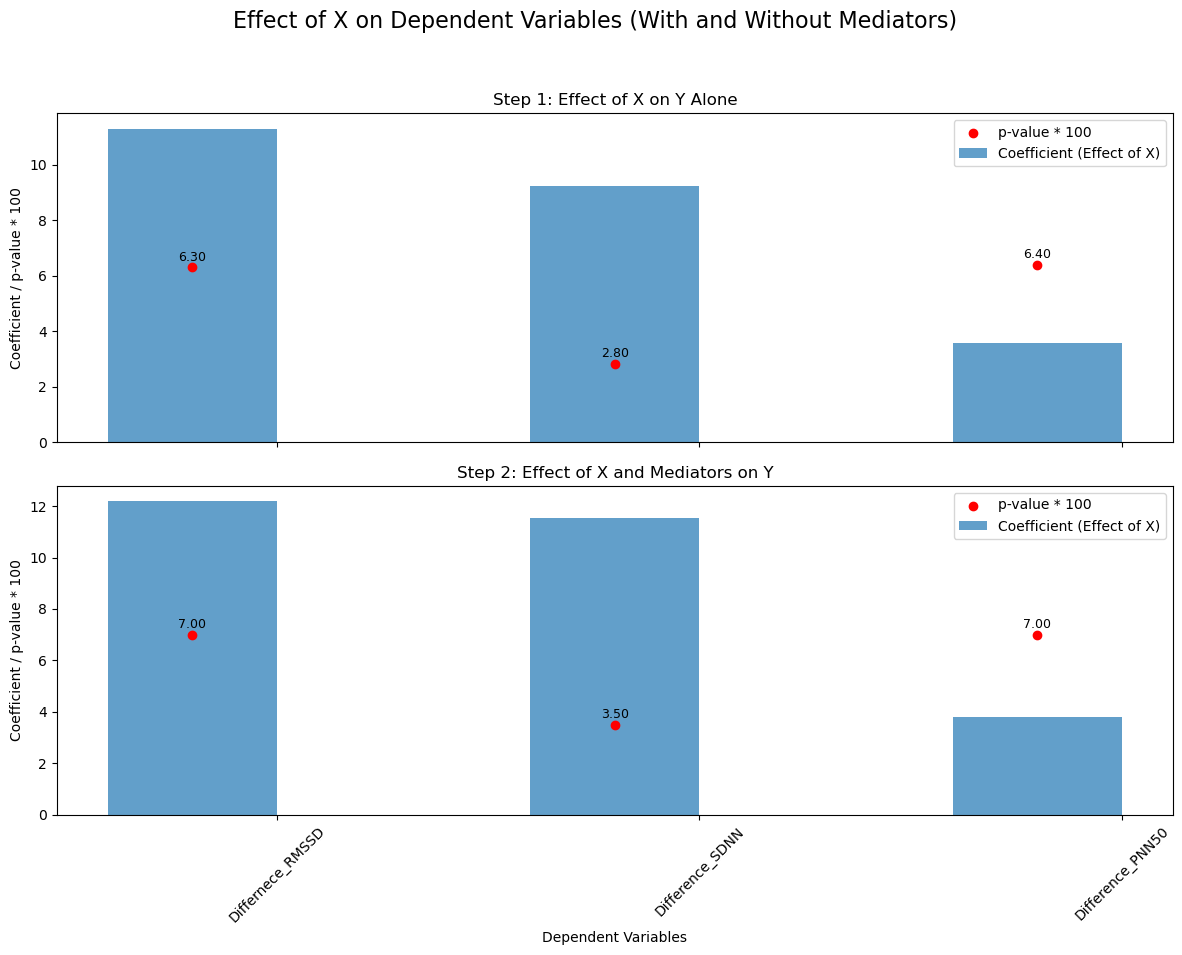

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example data for plotting
dependent_vars = ['Differnece_RMSSD', 'Difference_SDNN', 'Difference_PNN50']
step1_coefficients = [11.30, 9.23, 3.56]
step1_p_values = [0.063, 0.028, 0.064]
step2_coefficients = [12.18, 11.52, 3.78]
step2_p_values = [0.070, 0.035, 0.070]

x = np.arange(len(dependent_vars))  # Label positions

fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
fig.suptitle("Effect of X on Dependent Variables (With and Without Mediators)", fontsize=16)

# Plot Step 1: Effect of X on Y
axs[0].bar(x - 0.2, step1_coefficients, width=0.4, label="Coefficient (Effect of X)", alpha=0.7)
axs[0].scatter(x - 0.2, [p * 100 for p in step1_p_values], color="red", label="p-value * 100", zorder=5)
for i, val in enumerate([p * 100 for p in step1_p_values]):
    axs[0].annotate(f'{val:.2f}', (x[i] - 0.2, val), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)
axs[0].set_title("Step 1: Effect of X on Y Alone")
axs[0].set_ylabel("Coefficient / p-value * 100")
axs[0].legend()

# Plot Step 2: Effect of X and Mediators on Y
axs[1].bar(x - 0.2, step2_coefficients, width=0.4, label="Coefficient (Effect of X)", alpha=0.7)
axs[1].scatter(x - 0.2, [p * 100 for p in step2_p_values], color="red", label="p-value * 100", zorder=5)
for i, val in enumerate([p * 100 for p in step2_p_values]):
    axs[1].annotate(f'{val:.2f}', (x[i] - 0.2, val), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=9)
axs[1].set_title("Step 2: Effect of X and Mediators on Y")
axs[1].set_ylabel("Coefficient / p-value * 100")
axs[1].legend()

# Common X-axis
plt.xticks(x, dependent_vars, rotation=45)
axs[1].set_xlabel("Dependent Variables")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## 1- Calculate Direct, Indirect, and Total Effects

In [8]:
# Define dependent variables and mediators
dependent_vars = ['Differnece_RMSSD', 'Difference_SDNN', 'Difference_PNN50']
mediators = ['Differncein_LDL', 'Differencein_cholesterol', 'Differencein_TG', 'Differenceof_HDL']

# Placeholder lists for effectsdirect_effects = []
direct_effects= []
indirect_effects = []
total_effects = []

# Calculate Direct, Indirect, and Total Effects
for dependent_var in dependent_vars:
    # Step 1: Direct effect (X → Y without mediators)
    direct_model = smf.ols(f"{dependent_var} ~ Caseor_Control", data=data).fit()
    direct_effect = direct_model.params['Caseor_Control']
    
    # Step 2: Total effect (X + mediators → Y)
    total_model = smf.ols(f"{dependent_var} ~ Caseor_Control + {' + '.join(mediators)}", data=data).fit()
    total_effect = total_model.params['Caseor_Control']
    
    # Indirect effect = Total Effect - Direct Effect
    indirect_effect = total_effect - direct_effect
    
    # Append results
    direct_effects.append(direct_effect)
    indirect_effects.append(indirect_effect)
    total_effects.append(total_effect)

# Compile the results into a DataFrame
effects_df = pd.DataFrame({
    "Dependent Variable": dependent_vars,
    "Direct Effect (X → Y)(Coefficient)": direct_effects,
    "Indirect Effect (X → M → Y)(Coefficient)": indirect_effects,
    "Total Effect (Direct + Indirect)(Coefficient)": total_effects
})

# Display the results for the user
print("\nMediation Analysis: Mediation Analysis: Direct, Indirect, and Total Effects of X on Dependent Variables")
effects_df


Mediation Analysis: Mediation Analysis: Direct, Indirect, and Total Effects of X on Dependent Variables


,Dependent Variable,Direct Effect (X → Y)(Coefficient),Indirect Effect (X → M → Y)(Coefficient),Total Effect (Direct + Indirect)(Coefficient)
0,Differnece_RMSSD,11.300000,0.883591,12.183591
1,Difference_SDNN,9.233333,2.290973,11.524306
2,Difference_PNN50,3.556667,0.227185,3.783851


### Plot Direct, Indirect, and Total Effects

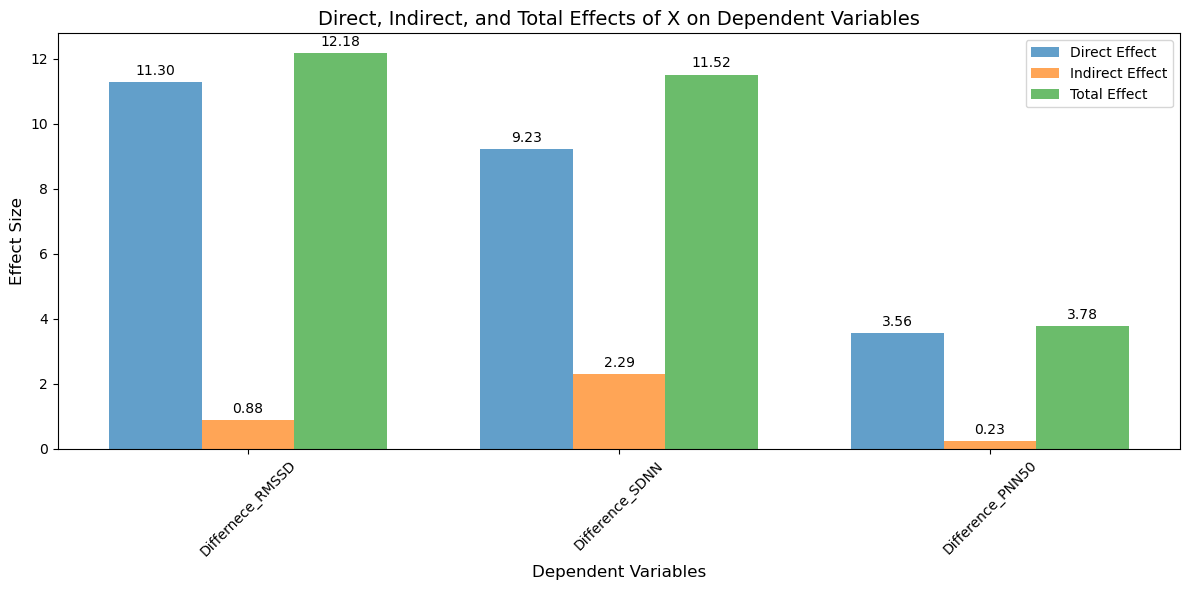

In [9]:
# Re-import necessary libraries and reinitialize data for visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dependent variables and results
dependent_vars = ['Differnece_RMSSD', 'Difference_SDNN', 'Difference_PNN50']

# Results from previous calculations
effects_df = pd.DataFrame({
    "Dependent Variable": dependent_vars,
    "Direct Effect (X → Y)": [11.30, 9.23, 3.56],
    "Indirect Effect (X → M → Y)": [0.88, 2.29, 0.23],
    "Total Effect (Direct + Indirect)": [12.18, 11.52, 3.78]
})

# Prepare data for visualization
x = np.arange(len(dependent_vars))  # Positions for dependent variables
width = 0.25  # Bar width

# Plot Direct, Indirect, and Total Effects
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - width, effects_df["Direct Effect (X → Y)"], width, label="Direct Effect", alpha=0.7)
bar2 = ax.bar(x, effects_df["Indirect Effect (X → M → Y)"], width, label="Indirect Effect", alpha=0.7)
bar3 = ax.bar(x + width, effects_df["Total Effect (Direct + Indirect)"], width, label="Total Effect", alpha=0.7)

# Add labels and title
ax.set_xlabel("Dependent Variables", fontsize=12)
ax.set_ylabel("Effect Size", fontsize=12)
ax.set_title("Direct, Indirect, and Total Effects of X on Dependent Variables", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(effects_df["Dependent Variable"], rotation=45)
ax.legend()

# Annotate bars with values
for bar in [bar1, bar2, bar3]:
    for rect in bar:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:       Differnece_RMSSD   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     4.272
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0432
Time:                        16:54:43   Log-Likelihood:                -267.29
No. Observations:                  60   AIC:                             538.6
Df Residuals:                      58   BIC:                             542.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -34.3667     19.329     -1.

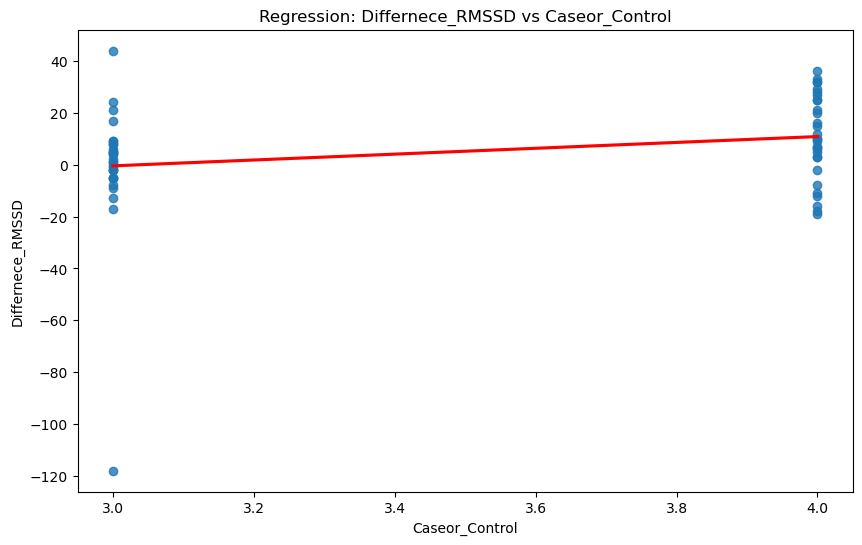

                            OLS Regression Results                            
Dep. Variable:        Difference_SDNN   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     4.075
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0481
Time:                        16:54:45   Log-Likelihood:                -256.58
No. Observations:                  60   AIC:                             517.2
Df Residuals:                      58   BIC:                             521.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -25.2667     16.171     -1.

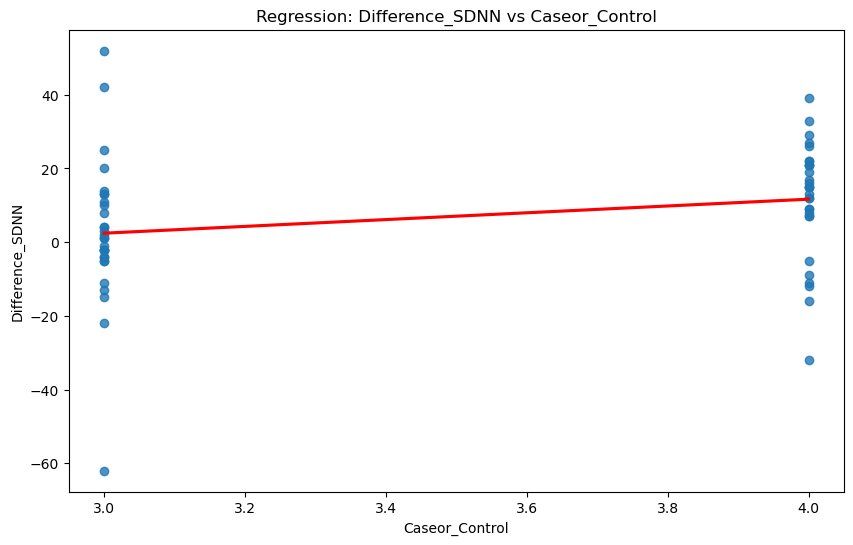

                            OLS Regression Results                            
Dep. Variable:       Difference_PNN50   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     4.453
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0392
Time:                        16:54:48   Log-Likelihood:                -196.68
No. Observations:                  60   AIC:                             397.4
Df Residuals:                      58   BIC:                             401.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.3100      5.959     -1.

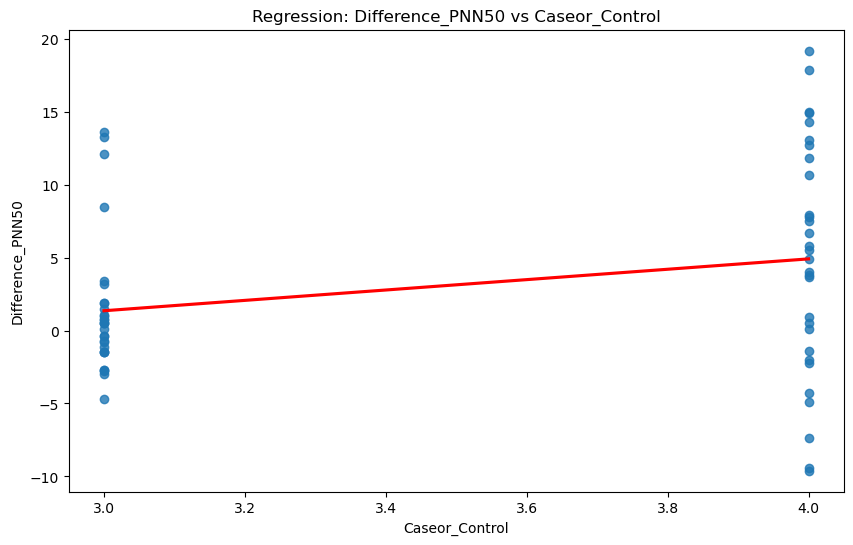

Analyzing the effect of "Caseor_Control" with all mediators on "Differnece_RMSSD":
                            OLS Regression Results                            
Dep. Variable:       Differnece_RMSSD   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     2.083
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0817
Time:                        16:54:50   Log-Likelihood:                -264.13
No. Observations:                  60   AIC:                             540.3
Df Residuals:                      54   BIC:                             552.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

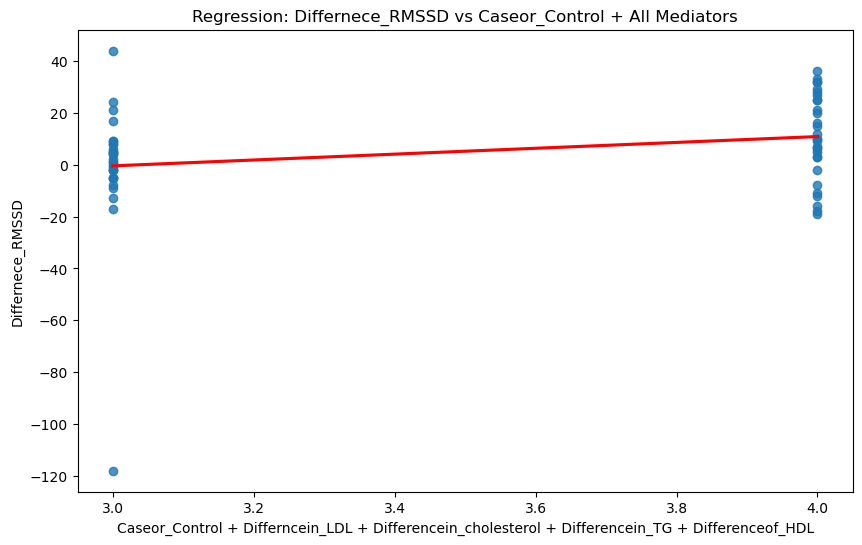

Analyzing the effect of "Caseor_Control" with all mediators on "Difference_SDNN":
                            OLS Regression Results                            
Dep. Variable:        Difference_SDNN   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     3.357
Date:                Sun, 01 Dec 2024   Prob (F-statistic):             0.0103
Time:                        16:54:52   Log-Likelihood:                -250.50
No. Observations:                  60   AIC:                             513.0
Df Residuals:                      54   BIC:                             525.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

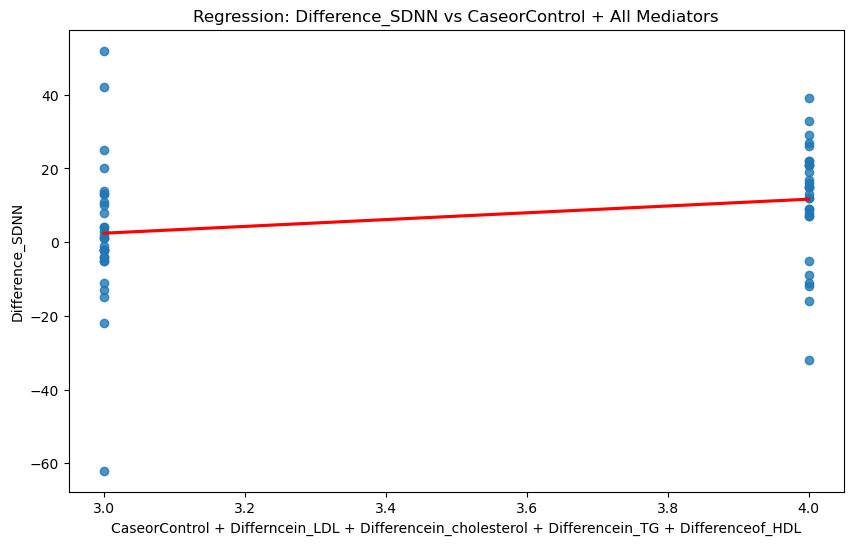

Analyzing the effect of "Caseor_Control" with all mediators on "DifferencePNN50":
                            OLS Regression Results                            
Dep. Variable:       Difference_PNN50   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.826
Date:                Sun, 01 Dec 2024   Prob (F-statistic):              0.123
Time:                        16:54:54   Log-Likelihood:                -194.21
No. Observations:                  60   AIC:                             400.4
Df Residuals:                      54   BIC:                             413.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

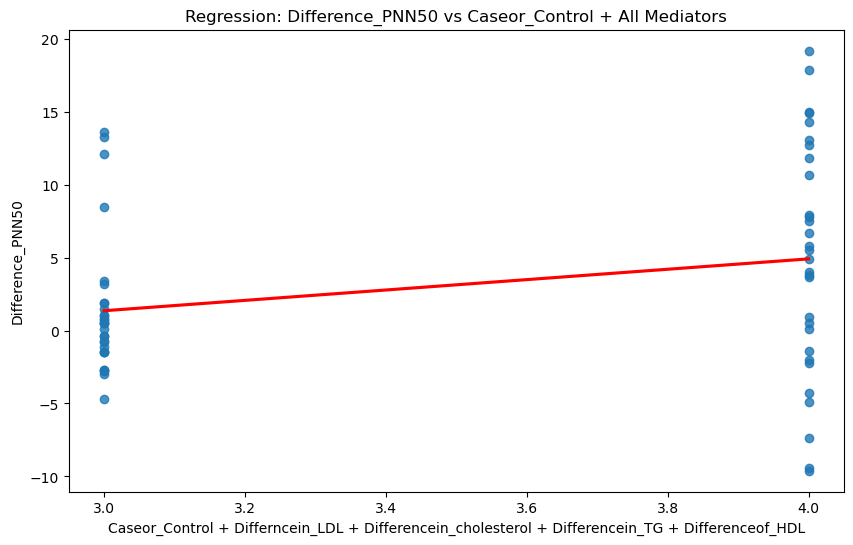

In [10]:
# Import necessary libraries for analysis

from sklearn.linear_model import LinearRegression


# Step 1: Analyzing effect of independent variable on each dependent variable
# Independent Variable: CaseorControl
# Dependent Variables: DifferneceRMSSD, DifferenceSDNN, DifferencePNN50

# Function to perform linear regression and visualize the results
def linear_regression_analysis(X, y, xlabel, ylabel):
    # Adding constant to predictor (for intercept in statsmodels)
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Summary of the model
    print(model.summary())
    
    # Plotting the regression
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X.iloc[:, 1], y=y, ci=None, line_kws={'color': 'red'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Regression: {ylabel} vs {xlabel}')
    plt.show()

# Step 3: Effect of CaseorControl on each dependent variable
X = data['Caseor_Control']

# Effect on DifferneceRMSSD
linear_regression_analysis(X, data['Differnece_RMSSD'], 'Caseor_Control', 'Differnece_RMSSD')

# Effect on DifferenceSDNN
linear_regression_analysis(X, data['Difference_SDNN'], 'Caseor_Control', 'Difference_SDNN')

# Effect on DifferencePNN50
linear_regression_analysis(X, data['Difference_PNN50'], 'Caseor_Control', 'Difference_PNN50')

# Step 4: Analyzing effect after adding all mediators together
mediators = ['Differncein_LDL', 'Differencein_cholesterol', 'Differencein_TG', 'Differenceof_HDL']

def linear_regression_with_all_mediators(X, mediators, y, xlabel, mediator_labels, ylabel):
    # Adding constant to predictor (for intercept)
    X = sm.add_constant(pd.concat([X, data[mediators]], axis=1))
    model = sm.OLS(y, X).fit()
    
    # Summary of the model
    print(model.summary())
    
    # Plotting the regression with combined mediators
    plt.figure(figsize=(10, 6))
    sns.regplot(x=X.iloc[:, 1], y=y, ci=None, line_kws={'color': 'red'})
    plt.xlabel(f'{xlabel} + {" + ".join(mediator_labels)}')
    plt.ylabel(ylabel)
    plt.title(f'Regression: {ylabel} vs {xlabel} + All Mediators')
    plt.show()

# Step 5: Effect after adding all mediators together for each dependent variable
mediator_labels = ['Differncein_LDL', 'Differencein_cholesterol', 'Differencein_TG', 'Differenceof_HDL']

print('Analyzing the effect of "Caseor_Control" with all mediators on "Differnece_RMSSD":')
linear_regression_with_all_mediators(data['Caseor_Control'], mediators, data['Differnece_RMSSD'], 'Caseor_Control', mediator_labels, 'Differnece_RMSSD')

print('Analyzing the effect of "Caseor_Control" with all mediators on "Difference_SDNN":')
linear_regression_with_all_mediators(data['Caseor_Control'], mediators, data['Difference_SDNN'], 'CaseorControl', mediator_labels, 'Difference_SDNN')

print('Analyzing the effect of "Caseor_Control" with all mediators on "DifferencePNN50":')
linear_regression_with_all_mediators(data['Caseor_Control'], mediators, data['Difference_PNN50'], 'Caseor_Control', mediator_labels, 'Difference_PNN50')


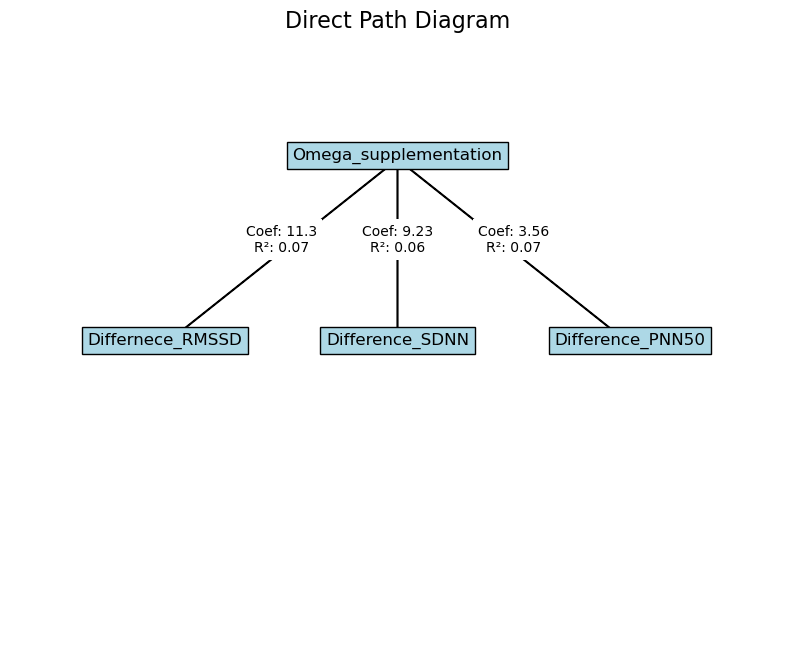

In [14]:
# Create a more detailed path diagram using Matplotlib

plt.figure(figsize=(10, 8))

# Define positions for all nodes
positions = {
    'Omega_supplementation': (0.5, 0.8),
    'Differnece_RMSSD': (0.2, 0.5),
    'Difference_SDNN': (0.5, 0.5),
    'Difference_PNN50': (0.8, 0.5)
}

# Draw nodes with their labels
for node, pos in positions.items():
    plt.text(pos[0], pos[1], node, ha='center', fontsize=12, bbox=dict(facecolor='lightblue', edgecolor='black'))

# Define edges with coefficients and R2 values
edges = [
    ('Omega_supplementation', 'Differnece_RMSSD', 11.30, 0.07),
    ('Omega_supplementation', 'Difference_SDNN', 9.23, 0.06),
    ('Omega_supplementation', 'Difference_PNN50', 3.56, 0.07)
]

# Draw arrows and annotate with coefficients and R2
for start, end, coef, r2 in edges:
    start_pos = positions[start]
    end_pos = positions[end]
    plt.arrow(start_pos[0], start_pos[1], end_pos[0] - start_pos[0], end_pos[1] - start_pos[1],
              head_width=0.02, head_length=0.02, fc='black', ec='black', length_includes_head=True)
    plt.text((start_pos[0] + end_pos[0]) / 2, (start_pos[1] + end_pos[1]) / 2,
             f'Coef: {coef}\nR²: {r2}', fontsize=10, ha='center', bbox=dict(facecolor='white', edgecolor='none'))

# Set plot limits and remove axes
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

# Title
plt.title("Direct Path Diagram", fontsize=16)
plt.show()
